In [1]:

# Set where to download IceSAT2 data
path = './Example_ATL06_JASON'

# Load ATL11 Data
# Array data_arr contains a list of dictionaries of ATL11 parameters.
files = list(Path(data_path).glob('*.h5'))

# Make array of ATL11 data
data_arr = []

# Each reference track pair is a group
group = ['/pt1','/pt2','/pt3']
# Use ptX for crossover point data

# Loop over files
for file in files:
    # Loop over pairs
    for i, g in enumerate(group):
        data = {}
        try:
            # Load variables into dictionary list
            with h5py.File(file, 'r') as fi:

files = list(Path(path).glob('*.h5'))
!h5ls -r {files[0]} 

SyntaxError: incomplete input (2728453921.py, line 22)

In [10]:
# Zachary Katz
# zachary_katz@mines.edu
# 02 April 2024

###
# Example of downloading ICESat2 ATL06 data locally and plotting. 
###

# Set where to download IceSAT2 data
path = './Example_ATL06_JASON'

# Set path to Scripps grounding line file.
# Downloaded from: https://doi.pangaea.de/10.1594/PANGAEA.819147
gl_path = '/mnt/d/Background/Antarctica_masksX/scripps_antarctica_polygons_v1.shp'

# Imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

import icepyx as ipx
import h5py
import shapefile
from pyproj import CRS, Transformer

from pathlib import Path
import os

# Helper Function
def ll2xy(lon, lat):
    """
    Transform coordinates from input geodetic coordinates (lon, lat)
    to output Antarctic Polar Stereographic coordinates (x, y)
    Can also take lists of floats.

    Parameters
    lon - Geodetic longitude in EPSG:4326 [float]
    lat - Geodetic latitude in EPSG:4326 [float]

    Returns
    x - Antarctic Polar Stereographic (EPSG:3031) x [float]
    y - Antarctic Polar Stereographic (EPSG:3031) y [float]
    """
    
    crs_ll = CRS("EPSG:4326")
    crs_xy = CRS("EPSG:3031")
    ll_to_xy = Transformer.from_crs(crs_ll, crs_xy, always_xy = True)
    x, y = ll_to_xy.transform(lon, lat)
    return x, y

In [22]:
# Download ATL11 data using icepyx
# You only need to run this cell once to download the files locally 
# Enter your NASA Earthdata username and password when prompted
#   or you can hardcode them as environmental variables.

# Adapted from: https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access.html and
# Some useful info about hdf5 files: https://github.com/ICESAT-2HackWeek/intro-hdf5/blob/master/notebooks/intro-is2-files.ipynb

# Set data product, bounding box, and date range
short_name = 'ATL06'
#spatial_extent = [-170, -85, -155, -83]
spatial_extent = [-103.125, -79.33, -102.875, -78.33]
date_range = ['2020-01-01', '2024-01-01']
# You can also specify specific tracks and cycles

#Get data query specifications for region
region = ipx.Query(short_name, spatial_extent, date_range)
print(region.avail_granules(ids=True)) # Number of files
print(len(region.avail_granules(ids=True)[0])) #File names

region.order_granules(verbose=True)
region.download_granules(path)

[['ATL06_20200101123002_00880611_006_01.h5', 'ATL06_20200105121401_01490610_006_01.h5', 'ATL06_20200105122141_01490611_006_01.h5', 'ATL06_20200109120540_02100610_006_01.h5', 'ATL06_20200125004546_04470612_006_01.h5', 'ATL06_20200207104141_06520610_006_01.h5', 'ATL06_20200222232146_08890612_006_01.h5', 'ATL06_20200226230743_09500611_006_01.h5', 'ATL06_20200226231326_09500612_006_01.h5', 'ATL06_20200301225922_10110611_006_01.h5', 'ATL06_20200303092602_10330610_006_01.h5', 'ATL06_20200303093343_10330611_006_01.h5', 'ATL06_20200322215749_13310612_006_01.h5', 'ATL06_20200326214343_00050711_006_01.h5', 'ATL06_20200326214926_00050712_006_01.h5', 'ATL06_20200330213521_00660711_006_01.h5', 'ATL06_20200401080945_00880711_006_03.h5', 'ATL06_20200405075347_01490710_006_03.h5', 'ATL06_20200405080128_01490711_006_03.h5', 'ATL06_20200409074527_02100710_006_02.h5', 'ATL06_20200428201129_05080711_006_02.h5', 'ATL06_20200428201712_05080712_006_02.h5', 'ATL06_20200504062951_05910710_006_01.h5', 'ATL06_20

In [23]:
# List possible parameters you can save

# Documentation of parameter names for ATL06: https://nsidc.org/data/atl06/versions/6
# In the link above, scroll down to 'Documentation' The two files I use most are the
# Data Dictionary [Gives what each parameter means] and the
# Algorithm Theoretical Basis Document [Gives info about how parameters are calculated]

files = list(Path(path).glob('*.h5'))
!h5ls -r {files[0]} 

/                        Group
/METADATA                Group
/METADATA/AcquisitionInformation Group
/METADATA/AcquisitionInformation/lidar Group
/METADATA/AcquisitionInformation/lidarDocument Group
/METADATA/AcquisitionInformation/platform Group
/METADATA/AcquisitionInformation/platformDocument Group
/METADATA/DataQuality    Group
/METADATA/DataQuality/CompletenessOmission Group
/METADATA/DataQuality/DomainConsistency Group
/METADATA/DatasetIdentification Group
/METADATA/Extent         Group
/METADATA/Lineage        Group
/METADATA/Lineage/ANC06-01 Group
/METADATA/Lineage/ANC06-02 Group
/METADATA/Lineage/ANC06-03 Group
/METADATA/Lineage/ANC17  Group
/METADATA/Lineage/ANC19  Group
/METADATA/Lineage/ANC25-06 Group
/METADATA/Lineage/ANC26-06 Group
/METADATA/Lineage/ANC28  Group
/METADATA/Lineage/ANC36-06 Group
/METADATA/Lineage/ANC38-06 Group
/METADATA/Lineage/ATL03  Group
/METADATA/Lineage/ATL09  Group
/METADATA/Lineage/Control Group
/METADATA/ProcessStep    Group
/METADATA/ProcessStep/

In [25]:
# Load ALT06 data into an array
data_arr = []

# Each beam is a group
group = ['/gt1l', '/gt1r', '/gt2l', '/gt2r', '/gt3l', '/gt3r']

# Loop over files
for file in files:
    # Loop over beams
    for i, g in enumerate(group):
        data = {}
        try:
            # Load variables into dictionary list
            with h5py.File(file, 'r') as fi:
                data['lat'] = fi[g+'/land_ice_segments/latitude'][:] #Latitude [Degrees]
                data['lon'] = fi[g+'/land_ice_segments/longitude'][:] #Longitude [Degrees]
                data['h_li'] = fi[g+'/land_ice_segments/h_li'][:] #Land Ice Height [meters]
                data['t_dt'] = fi[g+'/land_ice_segments/delta_time'][:] #GPS time since reference epoch [Seconds]
                data['q_flag'] = fi[g+'/land_ice_segments/atl06_quality_summary'][:] #Quality Flag
                #See table 4-3 in IceSat2 ATBD
                
                data['rgt'] = fi['/orbit_info/rgt'][:] # Reference ground track [Single Value]    
                data['t_ref'] = fi['/ancillary_data/atlas_sdp_gps_epoch'][:] # Epoch [Single Value]

                # Convert to Antarctic Polar Stereographic
                data['x'], data['y'] = ll2xy(data['lon'],data['lat'])

        # Skip file if error reading
        except:
            print('Skiiping group: ', g)
            print('in file: ', file)
            #continue
        
        data_arr.append(data)

Skiiping group:  /gt3l
in file:  Example_ATL06_JASON/processed_ATL06_20200105122141_01490611_006_01.h5
Skiiping group:  /gt3r
in file:  Example_ATL06_JASON/processed_ATL06_20200105122141_01490611_006_01.h5
Skiiping group:  /gt2l
in file:  Example_ATL06_JASON/processed_ATL06_20200109120540_02100610_006_01.h5
Skiiping group:  /gt2r
in file:  Example_ATL06_JASON/processed_ATL06_20200109120540_02100610_006_01.h5
Skiiping group:  /gt3l
in file:  Example_ATL06_JASON/processed_ATL06_20200109120540_02100610_006_01.h5
Skiiping group:  /gt3r
in file:  Example_ATL06_JASON/processed_ATL06_20200109120540_02100610_006_01.h5
Skiiping group:  /gt3l
in file:  Example_ATL06_JASON/processed_ATL06_20200207104141_06520610_006_01.h5
Skiiping group:  /gt3r
in file:  Example_ATL06_JASON/processed_ATL06_20200207104141_06520610_006_01.h5
Skiiping group:  /gt2l
in file:  Example_ATL06_JASON/processed_ATL06_20200222232146_08890612_006_01.h5
Skiiping group:  /gt2r
in file:  Example_ATL06_JASON/processed_ATL06_2020

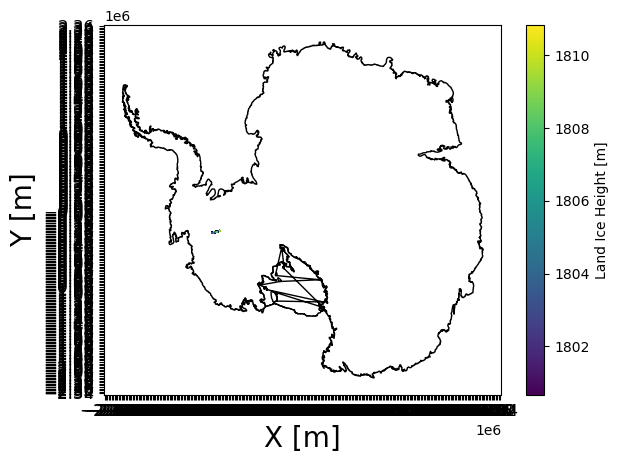

In [31]:
# Example plot of elevation along tracks

# Set desired region
bbox = [-200000,-620000,-140000,-550000]
#fig, ax = plt.subplots(figsize=[(bbox[2]-bbox[0])/100000 * 10,(bbox[3]-bbox[1])/100000 * 10])
fig, ax = plt.subplots()

# Scatter ICESat2 Data
for i, data in enumerate(data_arr):
    # Mask based on quality flag
    try:
        mx = np.ma.masked_array(data['x'], mask=data['q_flag'])
        my = np.ma.masked_array(data['y'], mask=data['q_flag'])
        sc = ax.scatter(mx,my,c=data['h_li'],s=0.01)
    except:
        pass

#Plot grounding line
#sf = shapefile.Reader(gl_path)
#for shape in sf.shapes(bbox=bbox):
#   points = shape.points
#   gl = plt.Polygon(points, fill=False, edgecolor="k")
#   ax.add_patch(gl)

plt.colorbar(sc, label='Land Ice Height [m]')

#ax.set_xlim(bbox[0], bbox[2])
#ax.set_ylim(bbox[1], bbox[3])
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.set_xlabel('X [m]',size=20)
ax.set_ylabel('Y [m]',size=20)
ax.tick_params(labelsize=12)

In [ ]:

fig, ax = plt.subplots(figsize=[(bbox[2]-bbox[0])/100000 * 10,(bbox[3]-bbox[1])/100000 * 10])
gl_path = '/mnt/d/Background/Antarctica_masks/scripps_antarctica_polygons_v1.shp'
sf = shapefile.Reader(gl_path)
# Split into asc and desc tracks based on initial y-value
for i, data in enumerate(data_arr):
     ax.scatter(data['x'],data['y'],color='red',s=0.01)

for shape in sf.shapes(bbox=bbox):
    points = shape.points
    gl = plt.Polygon(points, fill=False, edgecolor="k")
    ax.add_patch(gl)


ax.set_xlim(-200000,-140000)
ax.set_ylim(-620000,-550000)
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.set_xlabel('X [m]',size=20)
ax.set_ylabel('Y [m]',size=20)
ax.tick_params(labelsize=15)
plt.title('ATL06',size=20)
